## Mount the Google Drive onto the Colab as the storage location.

Following the instructions returned from the below cell. You will click a web link and select the google account you want to mount, then copy the authorication code to the blank, press enter.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Append the directory location where you upload the start code folder (In this problem, *RLalgs*) to the sys.path

E.g. dir = '/content/drive/My Drive/RL/.', start code folder is inside "RL" folder.

In [ ]:
import sys
sys.path.append('/content/gdrive/My Drive/RL/RLalgs2')
#sys.path.append('</dir/to/start/code/folder/.>')
print(sys.path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/content/gdrive/My Drive/RL/RLalgs2']


Your code should remain in the block marked by<br />
\############################<br />
\# YOUR CODE STARTS HERE<br />
\# YOUR CODE ENDS HERE<br />
\############################<br />
Please don't edit anything outside the block.

In [ ]:
% load_ext autoreload
% autoreload 2
import numpy as np
import random
import matplotlib.pyplot as plt
import gym

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Incremental Implementation of Average
We've finished the incremental implementation of average for you. Please call the function estimate with 1/step step size and fixed step size to compare the difference between this two on a simulated Bandit problem.<br />


In [ ]:
from utils import estimate
random.seed(6885)
numTimeStep = 10000
q_h = np.zeros(numTimeStep + 1) # Q Value estimate with 1/step step size
q_f = np.zeros(numTimeStep + 1) # Q value estimate with fixed step size
FixedStepSize = 0.5 #A large number to exaggerate the difference
for step in range(1, numTimeStep + 1):
    if step < numTimeStep / 2:
        r = random.gauss(mu = 1, sigma = 0.1)
    else:
        r = random.gauss(mu = 3, sigma = 0.1)
    
    #TIPS: Call function estimate defined in ./RLalgs/utils.py
    ############################
    # YOUR CODE STARTS HERE
    q_h[step] = estimate(q_h[step-1],1/step, r)
    q_f[step] = estimate(q_f[step-1], FixedStepSize, r)
    # YOUR CODE ENDS HERE
    ############################
    
q_h = q_h[1:]
q_f = q_f[1:]

<function matplotlib.pyplot.show>

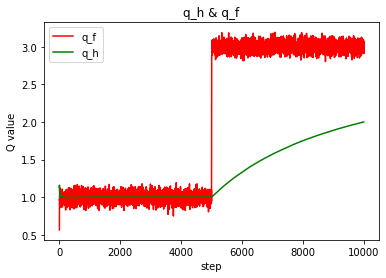

In [ ]:
############################
# YOUR CODE STARTS HERE
x = np.arange(numTimeStep)
y1 = np.array(q_f)
y2 = np.array(q_h)
plt.plot(x, y1, 'r', label = 'q_f')
plt.plot(x, y2, 'g', label = 'q_h')
plt.title("q_h & q_f")
plt.xlabel('step')
plt.ylabel('Q value')
plt.legend()
plt.show
# YOUR CODE ENDS HERE
############################

## 2. $\epsilon$-Greedy for Exploration
In Reinforcement Learning, we are always faced with the dilemma of exploration and exploitation. $\epsilon$-Greedy is a trade-off between them. You are gonna implement Greedy and $\epsilon$-Greedy. We combine these two policies in one function by treating Greedy as $\epsilon$-Greedy where $\epsilon = 0$. Edit the function epsilon_greedy in ./RLalgs/utils.py.<br />


In [ ]:
from utils import epsilon_greedy
np.random.seed(6885) #Set the seed to cancel the randomness
q = np.random.normal(0, 1, size = 5)
############################
# YOUR CODE STARTS HERE
greedy_action = None #Use epsilon = 0 for Greedy
e_greedy_action = None #Use epsilon = 0.1
# YOUR CODE ENDS HERE
############################
print('Values:')
print(q)
print('Greedy Choice =', greedy_action)
print('Epsilon-Greedy Choice =', e_greedy_action)

Values:
[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968]
Greedy Choice = None
Epsilon-Greedy Choice = None


You should get the following results.<br />
Values:<br />
\[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968\]<br />
Greedy Choice = 0<br />

## 3. Frozen Lake Environment 

In [ ]:
env = gym.make('FrozenLake-v0')

### 3.1 Derive Q value from V value
Edit function action_evaluation in ./RLalgs/utils.py.<br />
TIPS: $q(s, a)=\sum_{s',r}p(s',r|s,a)(r+\gamma v(s'))$<br />

In [ ]:
from utils import action_evaluation
v = np.ones(16)
q = action_evaluation(env = env.env, gamma = 1, v = v)
print('Action values:')
print(q)

Action values:
[[1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.33333333 1.33333333 1.33333333]
 [1.         1.         1.         1.        ]]


You should get Q values all equal to one except at State 14

Pseudo-codes of the following four algorithms can be found on Page 80, 83, 130, 131 of the Sutton's book.

### 3.2 Model-based RL algorithms

In [63]:
from utils import action_evaluation, action_selection, render

### 3.2.1 Policy Iteration
Edit the function policy_iteration and relevant functions in ./RLalgs/pi.py to implement the Policy Iteration Algorithm.<br />

In [64]:
from pi import policy_iteration
V, policy, numIterations = policy_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations to converge =', numIterations)

State values:
[0.82352774 0.8235272  0.82352682 0.82352662 0.82352791 0.
 0.52941063 0.         0.82352817 0.82352851 0.76470509 0.
 0.         0.88235232 0.94117615 0.        ]
Number of iterations to converge = 7


You should get values close to:<br />
State values:<br />
\[0.82352774 0.8235272  0.82352682 0.82352662 0.82352791 0.<br />
0.52941063 0.         0.82352817 0.82352851 0.76470509 0.<br />0.         0.88235232 0.94117615 0.\]

### 3.2.2 Value Iteration
Edit the function value_iteration and relevant functions in ./RLalgs/vi.py to implement the Value Iteration Algorithm.<br />

In [65]:
#Uncomment and run the following to evaluate your result, comment them when you generate the pdf
Q = action_evaluation(env = env.env, gamma = 1, v = V)
policy_estimate = action_selection(Q)
render(env, policy_estimate)

[autoreload of ql failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ModuleNotFoundError: No module named 'RLalgs'
]


  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG


KeyboardInterrupt: ignored

In [67]:
from vi import value_iteration
V, policy, numIterations = value_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations to converge =', numIterations)

State values:
[0.82352937 0.82352936 0.82352935 0.82352935 0.82352938 0.
 0.52941174 0.         0.82352938 0.82352939 0.76470586 0.
 0.         0.88235293 0.94117646 0.        ]
Number of iterations to converge = 500


You should get values close to:<br />
State values:<br />
\[0.82352773 0.82352718  0.8235268 0.8235266 0.8235279 0.<br />
0.52941062 0.         0.82352816 0.8235285 0.76470509 0.<br />0.         0.88235231 0.94117615 0.\]

In [ ]:
#Uncomment and run the following to evaluate your result, comment them when you generate the pdf
Q = action_evaluation(env = env.env, gamma = 1, v = V)
policy_estimate = action_selection(Q)
render(env, policy_estimate)

  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG


KeyboardInterrupt: ignored

### 3.3 Model free RL algorithms

### 3.3.1 Q-Learning
Edit the function QLearning in ./RLalgs/ql.py to implement the Q-Learning Algorithm.<br />

In [77]:
from ql import QLearning
Q = QLearning(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

[autoreload of ql failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ModuleNotFoundError: No module named 'RLalgs'
]


TypeError: ignored

Generally, you should get non-zero action values on non-terminal states.

In [ ]:
#Uncomment the following to evaluate your result, comment them when you generate the pdf
#env = gym.make('FrozenLake-v0')
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.3.2 SARSA
Edit the function SARSA in ./RLalgs/sarsa.py to implement the SARSA Algorithm.<br />

In [ ]:
from sarsa import SARSA
Q = SARSA(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

Generally, you should get non-zero action values on non-terminal states.

In [ ]:
#Uncomment the following to evaluate your result, comment them when you generate the pdf
#env = gym.make('FrozenLake-v0')
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.4 Human
You can play this game if you are interested. See if you can get the frisbee either with or without the model.

In [ ]:
from RLalgs.utils import human_play
#Uncomment and run the following to play the game, comment it when you generate the pdf
#env = gym.make('FrozenLake-v0')
#human_play(env)

## 4. Exploration VS. Exploitation
Try to reproduce Figure 2.2 (the upper one is enough) of the Sutton's book based on the experiment described in Chapter 2.3.<br />

In [ ]:
# Do the experiment and record average reward acquired in each time step
############################
# YOUR CODE STARTS HERE

# YOUR CODE ENDS HERE
############################

In [ ]:
# Plot the average reward
############################
# YOUR CODE STARTS HERE

# YOUR CODE ENDS HERE
############################

You should get curves similar to that in the book.